In [1]:
import os
import sys
%matplotlib widget
# module_path = os.path.abspath(os.path.join('../../'))
# if module_path not in sys.path:
#     sys.path.append(module_path)

In [2]:
import time
import torch
# from torch_geometric.loader import DataLoader
import argparse
import yaml
# from torch_geometric.nn import radius
from torch.optim import Adam
import torch.autograd.profiler as profiler
from torch.profiler import profile, record_function, ProfilerActivity

# from rbfConv import RbfConv
# from dataset import compressedFluidDataset, prepareData

import inspect
import re
def debugPrint(x):
    frame = inspect.currentframe().f_back
    s = inspect.getframeinfo(frame).code_context[0]
    r = re.search(r"\((.*)\)", s).group(1)
    print("{} [{}] = {}".format(r,type(x).__name__, x))
# %matplotlib notebook
import copy

import time
import torch
from torch.utils.data import DataLoader
from tqdm.notebook import trange, tqdm
import argparse
import yaml
# from torch_geometric.nn import radius
from torch.optim import Adam
import torch.autograd.profiler as profiler
from torch.profiler import profile, record_function, ProfilerActivity

from BasisConvolution.convLayerv2 import BasisConv
# from dataset import compressedFluidDataset, prepareData

import inspect
import re
def debugPrint(x):
    frame = inspect.currentframe().f_back
    s = inspect.getframeinfo(frame).code_context[0]
    r = re.search(r"\((.*)\)", s).group(1)
    print("{} [{}] = {}".format(r,type(x).__name__, x))


import tomli
from scipy.optimize import minimize
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt

seed = 0


import random 
import numpy as np
random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
np.random.seed(seed)
# print(torch.cuda.device_count())
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# print('running on: ', device)
torch.set_num_threads(1)

from joblib import Parallel, delayed

# from cutlass import *
# from rbfConv import *
from tqdm.autonotebook import tqdm
import random 
import numpy as np
from BasisConvolution.test_case_II.datautils import splitFile
from BasisConvolution.test_case_II.datautils import datasetLoader, loadFrame
from BasisConvolution.detail.windows import getWindowFunction
from BasisConvolution.test_case_II.util import constructFluidFeatures
from BasisConvolution.convNetv2 import BasisNetwork
from datetime import datetime
import portalocker
from BasisConvolution.detail.augment import augment
from BasisConvolution.test_case_II.training import processBatch
# from datautils import *
# from sphUtils import *
# from lossFunctions import *

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from BasisConvolution.test_case_II.util import setSeeds, loadDataset, getDataLoader, getFeatureSizes
from BasisConvolution.detail.util import count_parameters
import json
from BasisConvolution.test_case_II.util import NumpyArrayEncoder
import seaborn as sns
import matplotlib as mpl
import pandas as pd
from BasisConvolution.test_case_II.training import loadFrame, runNetwork
from BasisConvolution.detail.scatter import scatter_sum
from BasisConvolution.test_case_II.eval import getUnrollFrame

cm = mpl.colormaps['viridis']

/tmp/ipykernel_205730/4077246610.py:74: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
from BasisConvolution.test_case_II.arguments import parser

args = parser.parse_args("")
args.verbose = True

In [4]:
setSeeds(args.seed, args.verbose)

Setting all rng seeds to 42


In [5]:
if args.verbose:
    print('Available cuda devices:', torch.cuda.device_count())
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
if args.verbose:
    print('Running on Device %s' % device)
torch.set_num_threads(1)


Available cuda devices: 1
Running on Device cuda


In [6]:
training, trainingFiles = loadDataset(args.input + '/train/', limitData = args.limitData, frameDistance = args.frameDistance, maxUnroll = args.maxUnroll, adjustForFrameDistance = args.adjustForFrameDistance, verbose = args.verbose)

Input files:
	 0 ../../datasets/test_case_II//train/generative - 2023-03-22_14-41-01.hdf5
	 1 ../../datasets/test_case_II//train/generative - 2023-03-22_15-10-00.hdf5
	 2 ../../datasets/test_case_II//train/generative - 2023-03-22_15-30-36.hdf5
	 3 ../../datasets/test_case_II//train/generative - 2023-03-22_14-30-52.hdf5
	 4 ../../datasets/test_case_II//train/generative - 2023-03-22_15-24-38.hdf5
	 5 ../../datasets/test_case_II//train/generative - 2023-03-22_14-33-24.hdf5
	 6 ../../datasets/test_case_II//train/generative - 2023-03-22_14-59-06.hdf5
	 7 ../../datasets/test_case_II//train/generative - 2023-03-22_14-43-33.hdf5
	 8 ../../datasets/test_case_II//train/generative - 2023-03-22_14-35-55.hdf5
	 9 ../../datasets/test_case_II//train/generative - 2023-03-22_15-15-52.hdf5
	 10 ../../datasets/test_case_II//train/generative - 2023-03-22_14-56-29.hdf5
	 11 ../../datasets/test_case_II//train/generative - 2023-03-22_15-04-27.hdf5
	 12 ../../datasets/test_case_II//train/generative - 2023-03-

In [7]:
train_ds, train_dataloader = getDataLoader(training, args.batch_size, verbose = args.verbose)

Setting up data loaders


In [8]:
# fluidFeatureCount, boundaryFeatureCount = getFeatureSizes()
# print(fluidFeatureCount, boundaryFeatureCount)

In [9]:

# validation_ds = datasetLoader(validation)
# validation_dataloader = DataLoader(validation_ds, shuffle=True, batch_size = batch_size).batch_sampler

# if args.verbose:
#     print('Setting up network parameters:')
# fileName, frameIndex, maxRollout = train_ds[len(train_ds)//2]
# attributes, inputData, groundTruthData = loadFrame(fileName, frameIndex, 1 + np.arange(1))

# fluidPositions, boundaryPositions, fluidFeatures, boundaryFeatures = constructFluidFeatures(attributes, inputData)

# n = args.n
# m = args.m
# coordinateMapping = args.coordinateMapping
# windowFn = getWindowFunction(args.windowFunction)
# rbf_x = args.rbf_x
# rbf_y = args.rbf_y
# initialLR = args.lr
# maxRollOut = 10
# epochs = args.epochs
# frameDistance = args.frameDistance

# if args.verbose:
#     print('Network Hyperparameters:')
#     print('[n x m]: [%dx%d]'% (n, m))
#     print('[rbf_x x rbf_y]: [%sx%s]'% (rbf_x, rbf_y))
#     print('Mapping:', args.coordinateMapping)
#     print('window function:', args.windowFunction)
#     print('activation function:', args.activation)
#     print('initial learning rate: ', initialLR)
#     print('Training for %d epochs' % epochs)
#     print('Rollout limit (if applicable):', maxRollout)
#     print('Training with frame offset of', frameDistance)
#     print('Network architecture', args.arch)


In [10]:
hyperParameterDict = {}
hyperParameterDict['n'] = args.n
hyperParameterDict['m'] = args.m
hyperParameterDict['coordinateMapping'] = args.coordinateMapping
hyperParameterDict['rbf_x'] = args.rbf_x
hyperParameterDict['rbf_y'] = args.rbf_y
hyperParameterDict['windowFunction'] =  args.windowFunction
hyperParameterDict['liLoss'] = 'yes' if args.li else 'no'
hyperParameterDict['initialLR'] = args.lr
hyperParameterDict['maxRollOut'] = args.maxUnroll
hyperParameterDict['epochs'] = args.epochs
hyperParameterDict['frameDistance'] = args.frameDistance
hyperParameterDict['iterations'] = args.iterations
hyperParameterDict['dataDistance'] = args.dataDistance
hyperParameterDict['cutoff'] =  args.cutoff
hyperParameterDict['dataLimit'] =  args.limitData 
hyperParameterDict['arch'] =  args.arch
hyperParameterDict['seed'] =  args.seed
hyperParameterDict['minUnroll'] =  args.minUnroll
hyperParameterDict['maxUnroll'] =  args.maxUnroll
hyperParameterDict['augmentAngle'] =  args.augmentAngle
hyperParameterDict['augmentJitter'] =  args.augmentJitter
hyperParameterDict['jitterAmount'] =  args.jitterAmount
hyperParameterDict['networkSeed'] =  args.networkseed
hyperParameterDict['network'] = args.network
hyperParameterDict['normalized'] = args.normalized
hyperParameterDict['adjustForFrameDistance'] = args.adjustForFrameDistance
hyperParameterDict['fluidFeatures'] = getFeatureSizes(constructFluidFeatures)[0]
hyperParameterDict['boundaryFeatures'] = getFeatureSizes(constructFluidFeatures)[1]
hyperParameterDict['cutlassBatchSize'] = args.cutlassBatchSize
hyperParameterDict['normalized'] = args.normalized
hyperParameterDict['weight_decay'] = args.weight_decay
hyperParameterDict['input'] = args.input
hyperParameterDict['output'] = args.output
hyperParameterDict['iterations'] = 10
hyperParameterDict['trainingFiles'] = trainingFiles

In [11]:

widths = hyperParameterDict['arch'].strip().split(' ')
layers = [int(s) for s in widths]
# debugPrint(layers)
if args.verbose:
    print('Building Network')
setSeeds(hyperParameterDict['networkSeed'], verbose = args.verbose)

model = None
if args.network == 'default':
    model = BasisNetwork(hyperParameterDict['fluidFeatures'], hyperParameterDict['boundaryFeatures'], layers = layers, 
                   coordinateMapping = hyperParameterDict['coordinateMapping'], dims = [hyperParameterDict['n'], hyperParameterDict['m']], windowFn = getWindowFunction(hyperParameterDict['windowFunction']), 
                   rbfs = [hyperParameterDict['rbf_x'], hyperParameterDict['rbf_y']], batchSize = hyperParameterDict['cutlassBatchSize'], normalized = hyperParameterDict['normalized'])

hyperParameterDict['parameters'] =  count_parameters(model)

Building Network
Setting all rng seeds to 42


In [12]:
optimizer = Adam(model.parameters(), lr=hyperParameterDict['initialLR'], weight_decay = hyperParameterDict['weight_decay'])
model = model.to(device)

optimizer.zero_grad()
model.train()

BasisNetwork(
  (convs): ModuleList(
    (0-4): 5 x BasisConv()
  )
  (mlps): ModuleList()
  (fcs): ModuleList(
    (0): Linear(in_features=4, out_features=32, bias=True)
    (1): Linear(in_features=96, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Linear(in_features=64, out_features=3, bias=True)
  )
)

In [13]:
hyperParameterDict['timestamp'] = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
hyperParameterDict['networkPrefix'] = hyperParameterDict['network']
hyperParameterDict['exportString'] = '%s - n=[%2d,%2d] rbf=[%s,%s] map = %s window = %s d = %2d e = %2d arch %s distance = %2d - %s seed %s' % (
    hyperParameterDict['networkPrefix'], hyperParameterDict['n'], hyperParameterDict['m'], hyperParameterDict['rbf_x'], hyperParameterDict['rbf_y'], hyperParameterDict['coordinateMapping'], 
    hyperParameterDict['windowFunction'], hyperParameterDict['frameDistance'], hyperParameterDict['epochs'], 
    hyperParameterDict['arch'], hyperParameterDict['frameDistance'], hyperParameterDict['timestamp'], hyperParameterDict['networkSeed'])
hyperParameterDict['shortLabel'] = '%14s [%14s] - %s -> [%16s, %16s] x [%2d, %2d] @ %2s ' % (
    hyperParameterDict['windowFunction'], hyperParameterDict['arch'], hyperParameterDict['coordinateMapping'], 
    hyperParameterDict['rbf_x'], hyperParameterDict['rbf_y'], hyperParameterDict['n'], 
    hyperParameterDict['m'],hyperParameterDict['networkSeed'])

if args.verbose:
    print('Writing output to ./%s/%s' % (hyperParameterDict['output'], hyperParameterDict['exportString']))
    
# exportPath = './trainingData/%s - %s.hdf5' %(self.config['export']['prefix'], timestamp)
if not os.path.exists('./%s/%s' % (hyperParameterDict['output'], hyperParameterDict['exportString'])):
    os.makedirs('./%s/%s' % (hyperParameterDict['output'], hyperParameterDict['exportString']))

Writing output to ./../../trainingData/test_case_II/default - n=[ 4, 4] rbf=[linear,linear] map = cartesian window = poly6 d = 16 e = 25 arch 32 64 64 3 distance = 16 - 2024-03-12_13-45-08 seed 42


In [14]:

# self.outFile = h5py.File(self.exportPath,'w')

gtqdms = []
if args.verbose:
    print('Setting up tqdm progress bars')

with portalocker.Lock('README.md', flags = 0x2, timeout = None):
    for g in range(args.gpus):
        gtqdms.append(tqdm(range(0, (hyperParameterDict['epochs']) * hyperParameterDict['iterations']), position = g, leave = True))
    for g in range(args.gpus):
        gtqdms.append(tqdm(range(1, hyperParameterDict['epochs'] + 1), position = args.gpus + g, leave = True))
# print(torch.cuda.current_device())


def processDataLoaderIter(hyperParameterDict, e, rollout, ds, dataLoader, dataIter, model, optimizer, train, gtqdms, prefix = '', gpu = 0, gpus = 1):
    with record_function("prcess data loader"): 
        pbl = gtqdms[gpu + gpus]
        losses = []
        batchIndices = []

        if train:
            model.train(True)
        else:
            model.train(False)

        with portalocker.Lock('README.md', flags = 0x2, timeout = None):
            pbl.reset(total=hyperParameterDict['iterations'])
        i = 0
        for b in range(hyperParameterDict['iterations']):
            try:
                bdata = next(dataIter)
            except:
                dataIter = iter(dataLoader)
                bdata = next(dataIter)
                
            with record_function("prcess data loader[batch]"): 
                if train:
                    optimizer.zero_grad()
                batchLosses, meanLosses, minLosses, maxLosses, stdLosses = processBatch(model, device, True, e, rollout, ds, bdata, hyperParameterDict['frameDistance'], hyperParameterDict['augmentAngle'], hyperParameterDict['augmentJitter'], hyperParameterDict['jitterAmount'], adjustForFrameDistance = hyperParameterDict['adjustForFrameDistance'])
                # print(torch.max(model.ni))
                
                batchIndices.append(np.array(bdata))
                losses.append(batchLosses.detach().cpu().numpy())

                with record_function("prcess data loader[batch] - backward"): 
                    sumLosses = torch.mean(batchLosses[:,:,0]) #+ torch.mean(batchLosses[:,:,1])
                    if train:
                        sumLosses.backward()
                        optimizer.step()
                lossString = np.array2string(torch.mean(batchLosses[:,:,0],dim=0).detach().cpu().numpy(), formatter={'float_kind':lambda x: "%.2e" % x})
                batchString = str(np.array2string(np.array(bdata), formatter={'float_kind':lambda x: "%.2f" % x, 'int':lambda x:'%04d' % x}))

                with portalocker.Lock('README.md', flags = 0x2, timeout = None):
                    pbl.set_description('%8s[gpu %d]: %3d [%1d] @ %1.1e: :  %s -> %.2e' %(prefix, gpu, e, rollout, optimizer.param_groups[0]['lr'], batchString, sumLosses.detach().cpu().numpy()))
                    pbl.update()
                    if prefix == 'training':
                        # pb.set_description('[gpu %d] Learning: %1.4e Validation: %1.4e' %(args.gpu, np.mean(np.mean(np.vstack(losses)[:,:,0], axis = 1)), 0))
                        pb.set_description('[gpu %d] %90s - Learning: %1.4e' %(gpu, hyperParameterDict['shortLabel'], np.mean(np.mean(np.vstack(losses)[:,:,0], axis = 1))))
                    if prefix == 'validation':
                        pb.set_description('[gpu %d] Learning: %1.4e Validation: %1.4e' %(gpu, trainLoss, np.mean(np.mean(np.vstack(losses)[:,:,0], axis = 1))))
                    pb.update()
#                 i = i + 1
#                 if i > 100:
#                     break
        bIndices  = np.hstack(batchIndices)
        losses = np.vstack(losses)

        # idx = np.argsort(bIndices)
        # bIndices = bIndices[idx]
        # losses = losses[idx]

        epochLoss = losses
        return epochLoss

Setting up tqdm progress bars


  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

In [15]:
gpu = args.gpu

In [16]:

training = {}
# training_fwd = {}
validation = {}
testing = {}

pb = gtqdms[gpu]
with portalocker.Lock('README.md', flags = 0x2, timeout = None):
    pb.set_description('[gpu %d]' %(gpu))

trainLoss = 0
train_iter = iter(train_dataloader)

trainingEpochLosses = []
setSeeds(hyperParameterDict['seed'], verbose = args.verbose)

# pb.reset(total=len(train_dataloader))
for epoch in range(hyperParameterDict['epochs']):
    losses = []

    unroll = max(hyperParameterDict['minUnroll'], min(epoch // 2 + 1, hyperParameterDict['maxUnroll']))
    # trainingEpochLoss = processDataLoaderIter(args.iterations, epoch, epoch // 2 + 1, train_ds, train_dataloader, train_iter, model, optimizer, True, prefix = 'training', augmentAngle=args.argumentAngle, augmentJitter=args.augmentJitter, jitterAmount=args.jitterAmount)
    
    
# def processDataLoaderIter(hyperParameterDict, e, rollout, ds, dataLoader, dataIter, model, optimizer, gtqdms, train = True, prefix = '', gpu = 0, gpus = 1):
    trainingEpochLoss = processDataLoaderIter(hyperParameterDict, epoch, unroll, train_ds, train_dataloader, train_iter, model, optimizer, True, prefix = 'training', gtqdms = gtqdms, gpu = gpu, gpus = args.gpus)

#     trainingEpochLoss = processDataLoader(epoch,unroll, train_ds, train_dataloader, model, optimizer, True, prefix = 'training')
    trainingEpochLosses.append(trainingEpochLoss)
    # torch.save(model.state_dict(), './trainingData/%s/model_%03d.torch' % (exportString, epoch))
    if epoch % 5 == 0 and epoch > 0:
#         lr = lr * 0.5
        for param_group in optimizer.param_groups:
            param_group['lr'] = 0.5 * param_group['lr']
    torch.save(model.state_dict(), './%s/%s/model_%03d.torch' % (hyperParameterDict['output'], hyperParameterDict['exportString'], epoch))


Setting all rng seeds to 42


In [25]:

# hyperParameterDict['trainingFiles'] = trainingFiles

In [17]:
if args.verbose:
    print('End of training')
    
if args.verbose:
    print('Preparing training and validation data dicts')
trainDict = {}
for i in range(len(train_ds)):
    fileName, index, _ = train_ds[i]
    trainDict['%05d' % i] = {'file':fileName, 't':int( index)}
dataSetDict = {'training' : trainDict}
# validationDict = {}
# for i in range(len(validation_ds)):
#     fileName, index, _ = validation_ds[i]
#     validationDict['%05d' % i] = {'file':fileName, 't': int(index)}    
# dataSetDict = {'training' : trainDict, 'validation': validationDict}

End of training
Preparing training and validation data dicts


In [18]:

if args.verbose:
    print('Preparing training and validation loss dicts')
dataDict = {}
for e in range(len(trainingEpochLosses)):
    # if args.forwardLoss:
        # dataDict['%03d' % (e+1)] = {"validation": validationLosses[e], "training": trainingEpochLosses[e], "forward": trainingEpochLosses2[e]}
    # else:
        # dataDict['%03d' % (e+1)] = {"validation": validationLosses[e], "training": trainingEpochLosses[e]}
    dataDict['%03d' % (e+1)] = {"training": trainingEpochLosses[e]}
modelData = {'hyperParameters' : hyperParameterDict, 'dataSet': dataSetDict, 'epochData': dataDict, 'files': trainingFiles}

Preparing training and validation loss dicts


In [19]:

if args.verbose:
    print('Writing out result data to ./%s/%s/results.json' % (hyperParameterDict['output'], hyperParameterDict['exportString']))
encodedNumpyData = json.dumps(modelData, cls=NumpyArrayEncoder, indent=4) 
with open('./%s/%s/results.json' % (hyperParameterDict['output'], hyperParameterDict['exportString']), "w") as write_file:
    json.dump(modelData, write_file, cls=NumpyArrayEncoder, indent=4) 

Writing out result data to ./../../trainingData/test_case_II/default - n=[ 4, 4] rbf=[linear,linear] map = cartesian window = poly6 d = 16 e = 25 arch 32 64 64 3 distance = 16 - 2024-03-12_13-45-08 seed 42/results.json


Plotting training losses (kde plot)


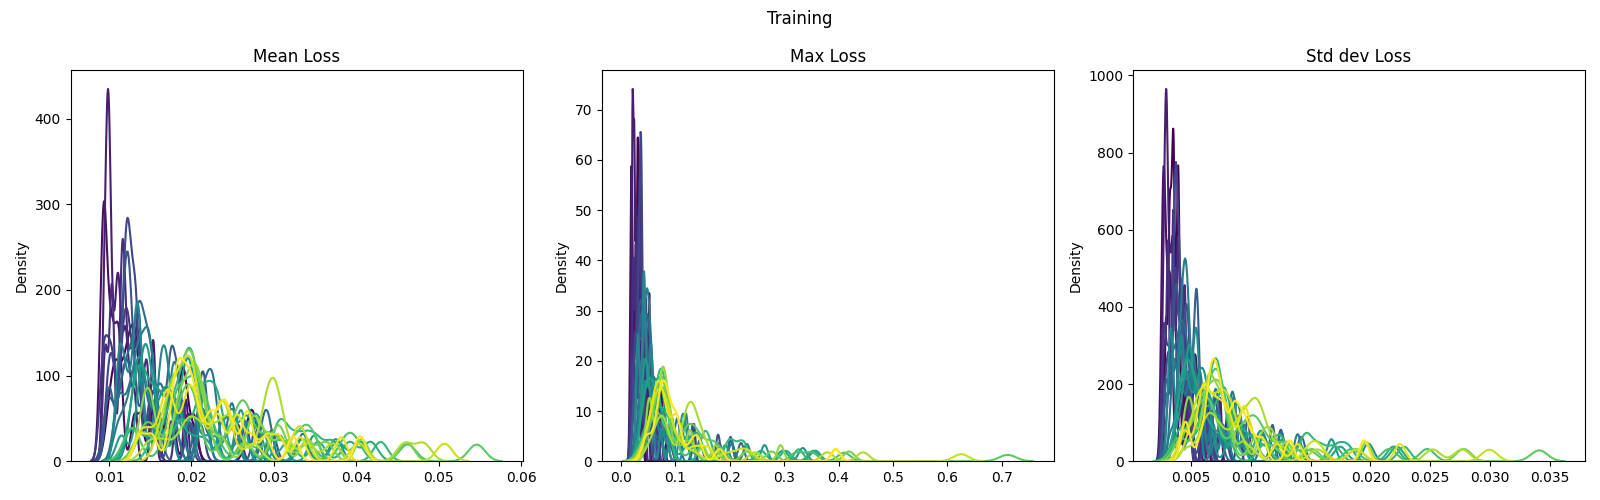

In [20]:

ei = -1
if args.verbose:
    print('Plotting training losses (kde plot)')

overallLosses = np.vstack([np.expand_dims(np.vstack((np.mean(e[:,:,0], axis = 1), np.max(e[:,:,1], axis = 1), np.min(e[:,:,2], axis = 1) , np.mean(e[:,:,3], axis = 1))),2).T for e in trainingEpochLosses])
fig, axis = plt.subplots(1, 3, figsize=(16,5), sharex = False, sharey = False, squeeze = False)

fig.suptitle('Training')

plt.sca(axis[0,0])
axis[0,0].set_title('Mean Loss')
axis[0,1].set_title('Max Loss')
axis[0,2].set_title('Std dev Loss')


for ei in range(overallLosses.shape[0]):
    plt.sca(axis[0,0])
    sns.kdeplot(overallLosses[ei,:,0], bw_adjust=.2, log_scale=False, label = 'epoch: %2d' % ei, c = cm(ei / ( overallLosses.shape[0] - 1)))
    plt.sca(axis[0,1])
    sns.kdeplot(overallLosses[ei,:,1], bw_adjust=.2, log_scale=False, label = 'epoch: %2d' % ei, c = cm(ei / ( overallLosses.shape[0] - 1)))
    plt.sca(axis[0,2])
    sns.kdeplot(overallLosses[ei,:,3], bw_adjust=.2, log_scale=False, label = 'epoch: %2d' % ei, c = cm(ei / ( overallLosses.shape[0] - 1)))

fig.tight_layout()
fig.savefig('./%s/%s/training_kde.png' % (hyperParameterDict['output'], hyperParameterDict['exportString']), dpi = 300)


In [21]:
testing, testingFiles = loadDataset(args.input + '/test/', limitData = args.limitData, frameDistance = args.frameDistance, maxUnroll = args.maxUnroll, adjustForFrameDistance = args.adjustForFrameDistance, verbose = args.verbose)

Input files:
	 0 ../../datasets/test_case_II//test/generative - 2023-03-13_10-01-01.hdf5
	 1 ../../datasets/test_case_II//test/generative - 2023-03-13_10-31-28.hdf5
	 2 ../../datasets/test_case_II//test/generative - 2023-03-13_10-16-02.hdf5
	 3 ../../datasets/test_case_II//test/generative - 2023-03-13_10-34-07.hdf5
	 4 ../../datasets/test_case_II//test/generative - 2023-03-13_10-36-42.hdf5
	 5 ../../datasets/test_case_II//test/generative - 2023-03-13_10-03-31.hdf5
	 6 ../../datasets/test_case_II//test/generative - 2023-03-13_10-39-18.hdf5
	 7 ../../datasets/test_case_II//test/generative - 2023-03-13_10-26-18.hdf5
	 8 ../../datasets/test_case_II//test/generative - 2023-03-13_10-18-34.hdf5
	 9 ../../datasets/test_case_II//test/generative - 2023-03-13_10-21-09.hdf5
	 10 ../../datasets/test_case_II//test/generative - 2023-03-13_10-28-47.hdf5
	 11 ../../datasets/test_case_II//test/generative - 2023-03-13_10-08-20.hdf5
	 12 ../../datasets/test_case_II//test/generative - 2023-03-13_10-05-55.h

In [22]:

dataSet = pd.DataFrame()
counter = 0

for epoch in modelData['epochData']:
    trainingData = modelData['epochData'][epoch]['training']
    for it in range(len(trainingData)):
        data = np.array(trainingData[it])
        stepLosses = np.mean(data, axis = 1)
        dataFrame = pd.DataFrame([{
            'rbf_x' : modelData['hyperParameters']['rbf_x'], 
            'rbf_y' : modelData['hyperParameters']['rbf_y'], 
            'n'     : modelData['hyperParameters']['n'], 
            'm'     : modelData['hyperParameters']['m'],
            'window': modelData['hyperParameters']['windowFunction'],
            'map'   : modelData['hyperParameters']['coordinateMapping'],
            'seed'  : modelData['hyperParameters']['networkSeed'],
            'arch'  : modelData['hyperParameters']['arch'],
            'epoch' : int(epoch),
            'epochIteration' : it,
            'iteration': counter + 1,
            'firstStepLoss': stepLosses[0],
            'lastStepLoss': stepLosses[-1],
            'meanLoss': np.mean(stepLosses)
                                }])
        counter = counter + 1
        dataSet = pd.concat([dataSet, dataFrame], ignore_index = True)

In [23]:
dataSet.to_csv('./%s/%s - training.csv' % (hyperParameterDict['output'], hyperParameterDict['exportString']))

In [24]:
model.train(False)

BasisNetwork(
  (convs): ModuleList(
    (0-4): 5 x BasisConv()
  )
  (mlps): ModuleList()
  (fcs): ModuleList(
    (0): Linear(in_features=4, out_features=32, bias=True)
    (1): Linear(in_features=96, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Linear(in_features=64, out_features=3, bias=True)
  )
)

In [25]:
from BasisConvolution.test_case_II.training import computeLoss
    
overallDict = pd.DataFrame()
if args.verbose:
    print('Performing unroll testing')
    for simulationIndex in tqdm([0,1,2,4], leave = False):
        for initialFrame in tqdm([0, 512, 1024, 2175], leave = False):
            unrollDict = getUnrollFrame(model, modelData, testingFiles, simulationIndex, initialFrame, 64, hyperParameterDict, device, verbose = True)
            overallDict = pd.concat([overallDict, unrollDict], ignore_index = True)
else:
    overallDict = pd.DataFrame()
    for simulationIndex in [0,1,2,4]:
        for initialFrame in [0, 512, 1024, 2175]:
            unrollDict = getUnrollFrame(model, modelData, testingFiles, simulationIndex, initialFrame, 64, hyperParameterDict, device, verbose = False)
            overallDict = pd.concat([overallDict, unrollDict], ignore_index = True)

Performing unroll testing


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

0it [00:00, ?it/s]

In [26]:

if args.verbose:
    print('Done.')
#     print('Writing testing output to "%s - testing.csv"' % inputFile)

# dataSet.to_csv('./%s/%s - training.csv' % (hyperParameterDict['output'], hyperParameterDict['exportString']))
overallDict.to_csv('./%s/%s - testing.csv' % (hyperParameterDict['output'], hyperParameterDict['exportString']))

Done.


In [27]:
display(dataSet)

,rbf_x,rbf_y,n,m,window,map,seed,arch,epoch,epochIteration,iteration,firstStepLoss,lastStepLoss,meanLoss
0,linear,linear,4,4,poly6,cartesian,42,32 64 64 3,1,0,1,0.016516,0.028522,0.022519
1,linear,linear,4,4,poly6,cartesian,42,32 64 64 3,1,1,2,0.009536,0.016441,0.012988
2,linear,linear,4,4,poly6,cartesian,42,32 64 64 3,1,2,3,0.015618,0.028184,0.021901
3,linear,linear,4,4,poly6,cartesian,42,32 64 64 3,1,3,4,0.015920,0.027073,0.021497
4,linear,linear,4,4,poly6,cartesian,42,32 64 64 3,1,4,5,0.010797,0.019284,0.015040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,linear,linear,4,4,poly6,cartesian,42,32 64 64 3,25,15,496,0.007672,0.039605,0.022587
496,linear,linear,4,4,poly6,cartesian,42,32 64 64 3,25,16,497,0.007598,0.031702,0.018702
497,linear,linear,4,4,poly6,cartesian,42,32 64 64 3,25,17,498,0.015886,0.124896,0.070343
498,linear,linear,4,4,poly6,cartesian,42,32 64 64 3,25,18,499,0.007502,0.027010,0.016718
